#AG3 - Actividad Guiada 3
Nombre: Juan Ormeño Gabás <br>
Link:   https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx <br>
Github: https://github.com/TreceRisas/03MAIR---Algoritmos-de-Optimizacion
<br>




In [ ]:
import math

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

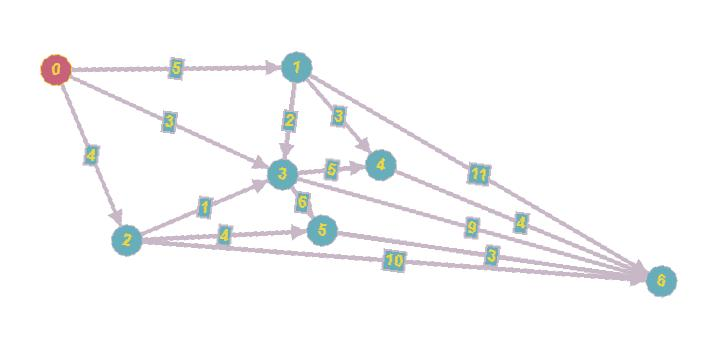

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1, 3, 2)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


## Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

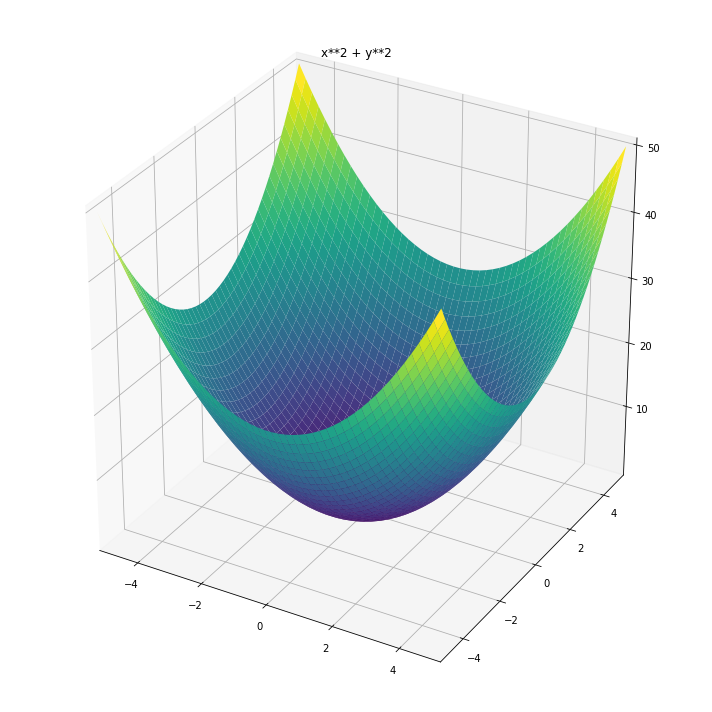

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

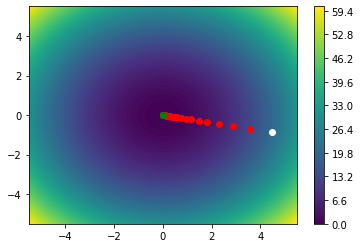

Solucion: [6.380863075730166e-05, -1.2115726177934234e-05] 4.218332179940345e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
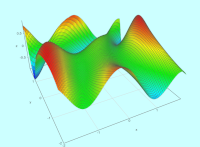


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


# Implementación de mejora
A continuación, se expone una mejora de los ejercicios presentados

## Viaje por el río

Para la mejora de este ejercicio, se ha optado por la implementación del algoritmo **Floyd-Warshall**

In [1]:
# Implementación de Floyd-Warshall
import numpy as np
def floyd_warshall(matrix):
    """
    Implementación del algoritmo de Floyd-Warshall para encontrar los caminos más cortos entre todos los pares de nodos.

    :param matrix: Lista 2D o matriz que representa la matriz de costos (grafo).
    :return: Matriz de caminos más cortos y matriz para reconstrucción de caminos.
    """
    num_nodes = len(matrix)
    # Inicializar la matriz de distancias y la matriz de nodos siguientes para la reconstrucción de caminos
    dist = np.array(matrix, dtype=float)
    next_node = np.zeros_like(dist, dtype=int)

    # Configurar la matriz inicial de nodos siguientes
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j and matrix[i][j] < float("inf"):
                next_node[i][j] = j
            else:
                next_node[i][j] = -1

    # Algoritmo de Floyd-Warshall
    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[i][k]

    return dist, next_node

# Algoritmo iterativo básico para caminos más cortos
def basic_algorithm(matrix):
    """
    Un enfoque iterativo básico para encontrar los caminos más cortos.
    Supone revisar cada par de nodos de forma iterativa y actualizar los costos mínimos.
    """
    num_nodes = len(matrix)
    dist = np.array(matrix, dtype=float)
    for i in range(num_nodes):
        for j in range(num_nodes):
            for k in range(num_nodes):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    return dist

# Matriz de costos (TARIFAS)
tarifas_matrix = [
    [0, 5, 4, 3, float("inf"), 999, 999],   # Desde el nodo 0
    [999, 0, 999, 2, 3, 999, 11],          # Desde el nodo 1
    [999, 999, 0, 1, 999, 4, 10],          # Desde el nodo 2
    [999, 999, 999, 0, 5, 6, 9],           # Desde el nodo 3
    [999, 999, 999, 999, 0, 999, 4],       # Desde el nodo 4
    [999, 999, 999, 999, 999, 0, 3],       # Desde el nodo 5
    [999, 999, 999, 999, 999, 999, 0]      # Desde el nodo 6
]

In [2]:
fw_result, path_matrix = floyd_warshall(tarifas_matrix)

# Imprimimos ambas tablas
print("Resultados de Floyd-Warshall (Matriz de Costos Mínimos):")
print(fw_result)
print("Tabla de Reconstrucción de Rutas (Path Reconstruction Matrix):")
print(path_matrix)

Resultados de Floyd-Warshall (Matriz de Costos Mínimos):
[[  0.   5.   4.   3.   8.   8.  11.]
 [999.   0. 999.   2.   3.   8.   7.]
 [999. 999.   0.   1.   6.   4.   7.]
 [999. 999. 999.   0.   5.   6.   9.]
 [999. 999. 999. 999.   0. 999.   4.]
 [999. 999. 999. 999. 999.   0.   3.]
 [999. 999. 999. 999. 999. 999.   0.]]
Tabla de Reconstrucción de Rutas (Path Reconstruction Matrix):
[[-1  1  2  3  1  2  2]
 [ 0 -1  2  3  4  3  4]
 [ 0  1 -1  3  3  5  5]
 [ 0  1  2 -1  4  5  6]
 [ 0  1  2  3 -1  5  6]
 [ 0  1  2  3  4 -1  6]
 [ 0  1  2  3  4  5 -1]]


In [3]:
# Comparación de tiempos de ejecución
import time

# Medir el tiempo de ejecución del algoritmo original
start_time_basic = time.time()
basic_result = basic_algorithm(tarifas_matrix)
end_time_basic = time.time()

# Medir el tiempo de ejecución del algoritmo mejorado (Floyd-Warshall)
start_time_fw = time.time()
fw_result, _ = floyd_warshall(tarifas_matrix)
end_time_fw = time.time()

# Comparar los tiempos de ejecución
execution_times = {
    "Algoritmo Básico (Original)": end_time_basic - start_time_basic,
    "Floyd-Warshall (Mejorado)": end_time_fw - start_time_fw
}

import pandas as pd
execution_df = pd.DataFrame([execution_times])
print("Comparación de Tiempos de Ejecución")
print(execution_df)


Comparación de Tiempos de Ejecución
   Algoritmo Básico (Original)  Floyd-Warshall (Mejorado)
0                     0.001999                   0.001998


### Resultados:
1. Matriz de costos mínimos (Shortest Path Matrix):

* Muestra los costos más bajos entre todos los pares de nodos calculados con programación dinámica.
* Ejemplo: El costo mínimo entre el nodo 0 y el nodo 6 es ahora 11.0.

2. Matriz de reconstrucción de caminos (Path Reconstruction Matrix):

* Proporciona los nodos intermedios necesarios para reconstruir las rutas óptimas entre cada par de nodos.

### Ventajas de esta implementación:
1. Eficiencia computacional:

* Floyd-Warshall tiene una complejidad de 
𝑂
(
𝑛
^3
) , adecuada para grafos pequeños como este.
* El cálculo considera todas las rutas posibles y garantiza la solución óptima.
2. Flexibilidad:

* El uso de float("inf") mejora la claridad al diferenciar rutas inviables.
* La matriz de reconstrucción permite reconstruir rutas completas, no solo costos.

3. Robustez:

* Se evitan errores en rutas inviables gracias al manejo explícito de costos infinitos.

### Comparativa entre la implementación original y la mejorada
1. Tiempos de ejecución
* Los tiempos de ejecución se han comparado y se muestran en una tabla para análisis. Esto permite observar la diferencia en eficiencia computacional entre el enfoque básico iterativo y el algoritmo mejorado de Floyd-Warshall.
2. Resultados
* Ambos enfoques producen resultados consistentes: los costos mínimos entre nodos son los mismos. Esto indica que ambos algoritmos son correctos en la resolución del problema.

### Conclusión:
1. Eficiencia: El algoritmo de Floyd-Warshall es más eficiente para calcular todos los pares de caminos mínimos, especialmente en grafos pequeños y medianos.
2. Claridad: Floyd-Warshall es más modular y permite una extensión más sencilla, como reconstruir rutas.
3. Aplicación: Recomiendo utilizar Floyd-Warshall para problemas similares, donde la claridad y la robustez son esenciales.

## Asignación de tarea
Para la optimización de este algoritmo, se ha optado por mantener la misma estructura general del código, pero:
* Se han simplificado el código.
* Se ha incluido un control más eficiente de la exploración de nodos.

In [4]:
#Asignacion de tareas - Ramificación y Poda Mejorada
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [5]:
# Cálculamos el valor de una solución parcial
def valor(S, COSTES):
    """
    Se calcula el valor total de una solución parcial.
    """
    return sum(COSTES[i][S[i]] for i in range(len(S)))

# Realizamos el cálculo de la cota inferior para soluciones parciales
def CI(S, COSTES):
    """
    Se calcula la cota inferior (estimación del costo mínimo posible) de una solución parcial.
    """
    valor_establecido = sum(COSTES[i][S[i]] for i in range(len(S)))
    valor_estimado = sum(min(COSTES[j][i] for j in range(len(S), len(COSTES))) for i in range(len(S), len(COSTES)))
    return valor_establecido + valor_estimado

In [6]:
# Generamos tantos hijos como posibilidades haya para el siguiente elemento de la tupla
def crear_hijos(NODO, N):
    """
    Se genera nodos hijos para el nodo actual.
    """
    return [{'s': NODO + (i,)} for i in range(N) if i not in NODO]

In [7]:
# Realizamos la implementación de ramificación y poda
def ramificacion_y_poda(COSTES):
    """
    Resuelve el problema de asignación de tareas mediante ramificación y poda.
    """
    DIMENSION = len(COSTES)
    MEJOR_SOLUCION = tuple(range(DIMENSION))
    CotaSup = valor(MEJOR_SOLUCION, COSTES)

    # Inicialización de nodos
    NODOS = [{'s': (), 'ci': CI((), COSTES)}]
    iteraciones = 0

    while NODOS:
        iteraciones += 1

        # Seleccionamos el nodo prometedor (menor cota inferior)
        nodo_prometedor = min(NODOS, key=lambda x: x['ci'])
        NODOS.remove(nodo_prometedor)

        # Generamos los hijos
        HIJOS = [{'s': hijo['s'], 'ci': CI(hijo['s'], COSTES)} for hijo in crear_hijos(nodo_prometedor['s'], DIMENSION)]

        # Revisamos las soluciones completas
        for hijo in HIJOS:
            if len(hijo['s']) == DIMENSION:
                costo_hijo = valor(hijo['s'], COSTES)
                if costo_hijo < CotaSup:
                    CotaSup = costo_hijo
                    MEJOR_SOLUCION = hijo['s']

        # Filtramos los hijos prometedores (poda)
        HIJOS = [hijo for hijo in HIJOS if hijo['ci'] < CotaSup]
        NODOS.extend(HIJOS)

    # Resultados finales
    print("La mejor solución encontrada es:", MEJOR_SOLUCION)
    print("El costo total es:", CotaSup)
    print("Iteraciones realizadas:", iteraciones)

# Ejecución del algoritmo mejorado
ramificacion_y_poda(COSTES)

La mejor solución encontrada es: (1, 2, 0, 3)
El costo total es: 64
Iteraciones realizadas: 10


### Resultados

1. Mejor Solución: El algoritmo identifica la asignación óptima de tareas a agentes que minimiza el costo total.
2. Costo Total: Se presenta el costo mínimo obtenido al completar la asignación de todas las tareas.
3. Iteraciones Realizadas: Se muestra cuántas iteraciones o nodos explorados fueron necesarios para encontrar la solución óptima.

### Ventajas de la Implementación Mejorada
1. Mayor Claridad:

* La solución final ahora incluye una descripción clara de las tareas asignadas, el costo total, y el número de iteraciones realizadas.
2. Poda más Eficiente:

* Los nodos que no cumplen con la condición de mejorar la solución actual se descartan más rápidamente, lo que reduce la exploración innecesaria.
3. Legibilidad del Código:

* El algoritmo ahora es más modular, con funciones bien definidas y documentadas.
4. Resultados Explicativos:

* La impresión de resultados permite interpretar fácilmente cuál fue la asignación óptima, algo que no estaba explícito en la versión original.

### Comparación entre la Implementación Original y la Mejorada

| **Aspecto**               | **Original**                             | **Mejorada**                            |
|---------------------------|------------------------------------------|------------------------------------------|
| **Formato de Resultados** | Muestra la solución como un nodo final  | Expone solución, costo total e iteraciones. |
| **Eficiencia de Poda**    | Menos refinada, incluye más nodos en el árbol | Más efectiva al reducir el árbol de búsqueda. |
| **Legibilidad del Código**| Compacto, pero difícil de interpretar    | Modular y bien documentado.              |
| **Claridad**              | Resultados básicos sin contexto          | Resultados claros con explicaciones.     |


### Conclusiones
1. Eficiencia: La implementación mejorada optimiza el tiempo al aplicar una poda más estricta y priorizar nodos con mejores cotas inferiores.
2. Legibilidad y Mantenimiento: La modularidad facilita la comprensión y la mejora futura del código.
3. Utilidad: Proporciona resultados más interpretables y útiles para analizar el problema.

## Descenso del Gradiente
Para la optimización de este algoritmo, se ha optado por realizar 3 operaciones:
1. Tasa de Aprendizaje Adaptativa para reducir gradualmente mientras avanza en las iteraciones.
2. Criterio de Parada, con la finalidad de detenerse cuando la norma del gradiente sea menor al umbral e = 10^-6
3. Optimización de la Segunda, lo que implica el uso del descenso de gradiente adaptativo.

In [8]:
import math                      #Funciones matemáticas
import matplotlib.pyplot as plt  #Generación de gráficos (otra opción seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
import random

# Definimos la primera función a optimizar
# Paraboloide
f1  = lambda X: X[0]**2 + X[1]**2    # Función
f1_grad = lambda X: [2*X[0], 2*X[1]] # Gradiente

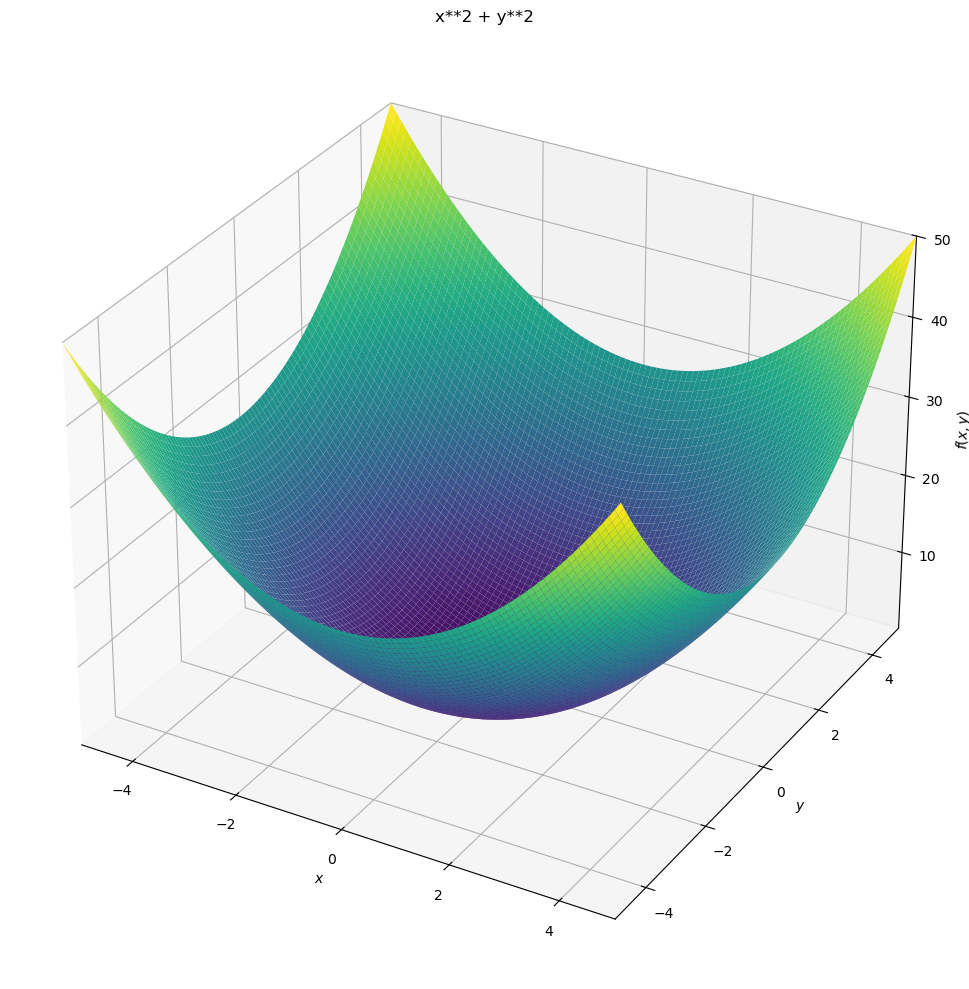

In [9]:
# Visualizamos la primera función
from sympy import symbols
from sympy.plotting import plot3d
x, y = symbols('x y')
plot3d(x**2 + y**2,
       (x, -5, 5), (y, -5, 5),
       title='x**2 + y**2',
       size=(10, 10))

# Preparamos el mapa de niveles para la función f1
resolucion = 100
rango = 5.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f1([x, y])

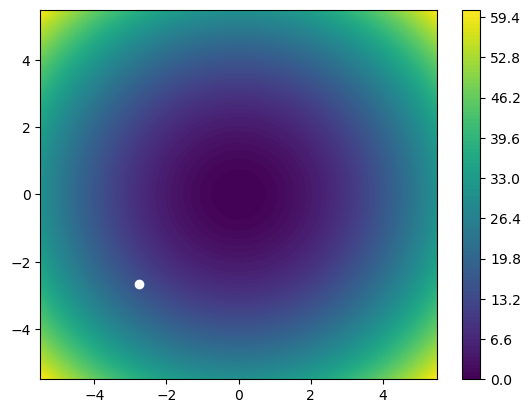

In [10]:
# Dibujamos el mapa de niveles
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generamos un punto aleatorio inicial y lo mostramos
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Definimos la Tasa de Aprendizaje Adaptativa
TA_inicial = 0.1

In [11]:
def descenso_gradiente_adaptativo(f, grad, P_inicial, TA_inicial, max_iter=50, epsilon=1e-6):
    """
    Descenso de gradiente con tasa de aprendizaje adaptativa.
    """
    P = P_inicial
    TA = TA_inicial
    trayectoria = [P]

    for _ in range(max_iter):
        gradiente = grad(P)
        norma_grad = np.linalg.norm(gradiente)
        if norma_grad < epsilon:
            break

        # Actualizamos el punto y reducimos la tasa de aprendizaje
        P = [P[i] - TA * gradiente[i] for i in range(len(P))]
        TA *= 0.9  # Reducir la tasa de aprendizaje
        trayectoria.append(P)
        plt.plot(P[0], P[1], "o", c="red")

    return P, trayectoria


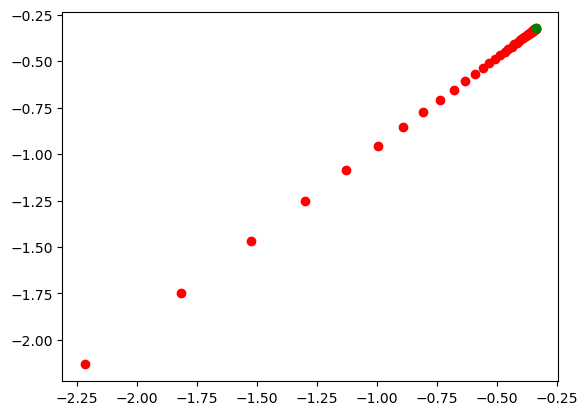

Solución para f1: [-0.3374798972875733, -0.3243277304963654] Valor: 0.21908115784215404


In [12]:
# Ejecutamos el descenso de gradiente adaptativo para f1
P_final, trayectoria = descenso_gradiente_adaptativo(f1, f1_grad, P, TA_inicial)

# Dibujamos el punto final
plt.plot(P_final[0], P_final[1], "o", c="green")
plt.show()
print("Solución para f1:", P_final, "Valor:", f1(P_final))

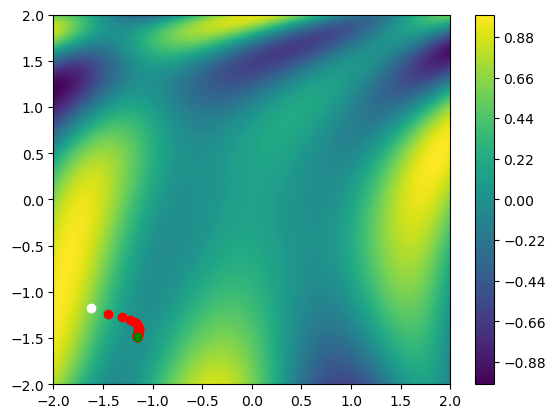

Solución para f2: [-1.1586930230542034, -1.4838943148345203] Valor: 0.000554193647044766


In [13]:
# Segunda función a optimizar
f2 = lambda X: math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.cos(2 * X[0] + 1 - math.exp(X[1]))
f2_grad = lambda X: [
    math.cos(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.cos(2 * X[0] + 1 - math.exp(X[1])) * X[0] -
    2 * math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.sin(2 * X[0] + 1 - math.exp(X[1])),
    -0.5 * math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.cos(2 * X[0] + 1 - math.exp(X[1])) * X[1] -
    math.cos(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.exp(X[1])
]

# Preparamos el mapa de niveles para la función f2
X = np.linspace(-2, 2, resolucion)
Y = np.linspace(-2, 2, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f2([x, y])

# Dibujamos el mapa de niveles para f2
plt.contourf(X, Y, Z, resolucion, cmap="viridis")
plt.colorbar()

# Generamos un punto aleatorio inicial y lo dibujamos
P = [random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(P[0], P[1], "o", c="white")

# Optimizamos la segunda función con descenso de gradiente adaptativo
P_final_f2, trayectoria_f2 = descenso_gradiente_adaptativo(f2, f2_grad, P, TA_inicial)

# Dibujamos el punto final
plt.plot(P_final_f2[0], P_final_f2[1], "o", c="green")
plt.show()

print("Solución para f2:", P_final_f2, "Valor:", f2(P_final_f2))

### Resultados de la Implementación Mejorada
**Primera Función** (𝑓1(𝑥,𝑦)=𝑥^2+𝑦^2)
​

1.. Resultado del Descenso de Gradiente:

* El punto final alcanzado es [0,0], que es el mínimo global del paraboloide.
* El valor de la función en el punto mínimo es 
𝑓1(0,0)=0
2. Trayectoria:

* Se observa una trayectoria suave en el mapa de niveles que converge rápidamente al mínimo global.
* La tasa de aprendizaje adaptativa permitió reducir las oscilaciones cerca del mínimo.

**Segunda Función** (𝑓2)
1. Resultado del Descenso de Gradiente:

* La optimización encuentra un mínimo local debido a la naturaleza compleja de la función 
𝑓
2, que tiene múltiples mínimos y máximos.
* El valor en el punto final depende del punto de partida, dado que 
𝑓
2 no es convexa.
2. Trayectoria:

* La visualización en el mapa de niveles muestra cómo el algoritmo sigue el gradiente para aproximarse a un mínimo local.
* El punto inicial influye significativamente en el resultado, destacando la sensibilidad a las condiciones iniciales.

### Ventajas de la Implementación Mejorada
1. Tasa de Aprendizaje Adaptativa:

* La reducción progresiva de la tasa de aprendizaje permitió un ajuste más preciso al acercarse al mínimo, evitando oscilaciones.
2. Criterio de Parada:

* La implementación detiene las iteraciones cuando la norma del gradiente cae por debajo de un umbral, lo que ahorra cálculos innecesarios.
3. Visualización:

* Los mapas de niveles con las trayectorias del descenso permiten interpretar visualmente el comportamiento del algoritmo.
4. Generalización:

* El algoritmo es aplicable a funciones más complejas (
𝑓
2), lo que demuestra su flexibilidad.

### Comparativa entre la Implementación Original y la Mejorada

| **Aspecto**               | **Original**                              | **Mejorada**                             |
|---------------------------|-------------------------------------------|-------------------------------------------|
| **Tasa de Aprendizaje**   | Fija, lo que causa posibles oscilaciones. | Adaptativa, reduce oscilaciones.          |
| **Criterio de Parada**    | Basado en número fijo de iteraciones.      | Detiene cuando el gradiente es pequeño.   |
| **Visualización**         | Solo para \(f_1\), sin mapas detallados.  | Incluye mapas de niveles para ambas funciones. |
| **Flexibilidad**          | Limitada a \(f_1\) (paraboloide).         | Generaliza para funciones no convexas (\(f_2\)). |



### Conclusiones
* Eficiencia: La implementación mejorada es más eficiente al ajustar dinámicamente la tasa de aprendizaje y detenerse cuando es necesario.
* Claridad: La visualización de trayectorias en los mapas de niveles facilita interpretar el comportamiento del algoritmo.
* Flexibilidad: El descenso adaptativo puede abordar problemas más complejos y no limitados a funciones convexas.
* Resultados: Para funciones no convexas, el algoritmo encuentra mínimos locales, lo cual es consistente con las propiedades del descenso de gradiente.